In [1]:
# Full library list and version numbers

print('This notebook was prepared using:')

import sys
print('python version %s' % sys.version)

import numpy as np
print('numpy version %s' % np.__version__)

import seaborn as sns
print('seaborn version %s' % sns.__version__)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
print('matplotlib version %s' % matplotlib.__version__)

import scipy
from scipy import stats
print('scipy version %s' % scipy.__version__)

import pickle
print('pickle version %s' % pickle.format_version)

from datetime import datetime
from tabulate import tabulate

import importlib

# sys.path.append('../paper-clade-reconstruction/src')
sys.path.append('./src')
import MPL as MPL
import analyze_and_plot as AP
import reconstruct_clades as RC
import infer_fitness as IF
import print_info as PI
import simulation_helper as SH
import data_parser as DP
import LTEE
import LTEE_helper as LH
import mplot as mp  # See mplot.py in the current directory
import lolipop_helper
import PALTEanalysis
import tobramycin_analysis
import figures as FIG

# GitHub directories
DATA_DIR = './data'
FIG_DIR = './figures'
LOCAL_JOBS_DIR = './data/local_jobs'
SIMULATION_DIR = './data/simulation'
SIMULATION_DIR_REL = '../simulation'

LOLIPOP_JOBS_DIR = './data/lolipop/jobs'
LOLIPOP_INPUT_DIR = './data/lolipop/input'
LOLIPOP_OUTPUT_DIR = './data/lolipop/output'
LOLIPOP_PARSED_OUTPUT_DIR = './data/lolipop/parsed_output'

CLUSTER_JOBS_DIR = './data/cluster_jobs'
LTEE_TRAJ_DIR = './data/LTEE_trajectories'
CLUSTERIZATION_OUTPUT_DIR = './data/clusterization_output'
RECONSTRUCTION_OUTPUT_DIR = './data/reconstruction_output'

LTEE_TRAJ_DIR_REL = '../LTEE_trajectories'
CLUSTERIZATION_OUTPUT_DIR_REL = '../clusterization_output'

METHODS = FIG.METHODS

This notebook was prepared using:
python version 3.7.13 (default, Mar 28 2022, 07:24:34) 
[Clang 12.0.0 ]
numpy version 1.16.2
seaborn version 0.11.2
matplotlib version 3.1.2
scipy version 1.5.2
pickle version 4.0


In [2]:
def reload():
    importlib.reload(AP)
    importlib.reload(RC)
    importlib.reload(IF)
    importlib.reload(LH)
    importlib.reload(PI)
    importlib.reload(lolipop_helper)
    importlib.reload(FIG)
    importlib.reload(PALTEanalysis)
    importlib.reload(tobramycin_analysis)
    importlib.reload(mp)
    importlib.reload(SH)
    importlib.reload(DP)
    importlib.reload(MPL)
reload()

In [3]:
def resetPlottingParams():
    PARAMS = {'text.usetex': False, 'mathtext.fontset': 'stixsans', 'mathtext.default': 'regular', 'pdf.fonttype': 42, 'ps.fonttype': 42}
    plt.rcParams.update(matplotlib.rcParamsDefault)
    plt.rcParams.update(PARAMS)

In [4]:
resetPlottingParams()

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# Load LTEE data

In [ ]:
%%time
# Load variables for LTEE data
reload()
LH.loadData(LH.populations)

In [7]:
for pop in LH.populations_nonmutator:
    print(f"Nonmutator pop {pop}, numAlleles={len(LH.data[pop]['sites'])}")
for pop in LH.populations_mutator:
    print(f"Mutator pop {pop}, numAlleles={len(LH.data[pop]['sites'])}")

Nonmutator pop m5, numAlleles=406
Nonmutator pop m6, numAlleles=221
Nonmutator pop p1, numAlleles=466
Nonmutator pop p2, numAlleles=174
Nonmutator pop p4, numAlleles=201
Nonmutator pop p5, numAlleles=202
Mutator pop m1, numAlleles=4597
Mutator pop m2, numAlleles=3488
Mutator pop m3, numAlleles=3255
Mutator pop m4, numAlleles=4872
Mutator pop p3, numAlleles=6102
Mutator pop p6, numAlleles=10134


In [8]:
indices = np.argsort([len(LH.data[pop]['sites']) for pop in LH.populations])
populations_sorted_by_num_alleles = [LH.populations[i] for i in indices]
num_alleles_sorted = sorted([len(LH.data[pop]['sites']) for pop in LH.populations])
print(populations_sorted_by_num_alleles)
print(num_alleles_sorted)

['p2', 'p4', 'p5', 'm6', 'm5', 'p1', 'm3', 'm2', 'm1', 'm4', 'p3', 'p6']
[174, 201, 202, 221, 406, 466, 3255, 3488, 4597, 4872, 6102, 10134]


# Reconstruction on LTEE data

## Submit clustering jobs to cluster

In [8]:
# Save trajectories as input files for clusterization jobs on cluster
reload()
LH.save_LTEE_trajectories()

In [59]:
reload()
LH.generate_clustering_job_script()

### Clustering using flattened trajectories

In [80]:
# reload()
# LH.get_flattened_traj()
# LH.save_LTEE_trajectories_flattened()
# LH.generate_clustering_job_script(use_flattened_traj=True)

### Clustering for multiple competition periods

#### Pop p3

In [11]:
reload()
pop = 'p3'
tSplit_list = [40, 50, 60, 70, 75, 80]
T = len(LH.TIMES_INTPL)
for tSplit in tSplit_list:
    LH.save_LTEE_trajectories_for_a_pop(pop, tStart=0, tEnd=tSplit)
    LH.save_LTEE_trajectories_for_a_pop(pop, tStart=tSplit, tEnd=T)

In [12]:
tStart_list = [0, 0, 0, 0, 0, 0, 40, 50, 60, 70, 75, 80]
tEnd_list = [40, 50, 60, 70, 75, 80, T, T, T, T, T, T]
LH.generate_clustering_job_script_for_a_pop(pop, tStart_list, tEnd_list)

#### Pop m3

In [14]:
reload()
pop = 'm3'
tSplit_list = [90, 95, 100]
T = len(LH.TIMES_INTPL)
for tSplit in tSplit_list:
    LH.save_LTEE_trajectories_for_a_pop(pop, tStart=0, tEnd=tSplit)
    LH.save_LTEE_trajectories_for_a_pop(pop, tStart=tSplit, tEnd=T)

tSplit_list = [100, 105, 110, 115]
for tSplit in tSplit_list:
    LH.save_LTEE_trajectories_for_a_pop(pop, tStart=95, tEnd=tSplit)
    LH.save_LTEE_trajectories_for_a_pop(pop, tStart=tSplit, tEnd=T)

In [15]:
tStart_list = [0, 0, 0, 90, 95, 100, 95, 95, 95, 95, 100, 105, 110, 115]
tEnd_list = [90, 95, 100, T, T, T, 100, 105, 110, 115, T, T, T, T]
LH.generate_clustering_job_script_for_a_pop(pop, tStart_list, tEnd_list)

## Reconstruction

In [9]:
%%time
reload()
LH.reconstruct_for_LTEE_and_save(LH.populations)

CPU times: user 3min 42s, sys: 7.67 s, total: 3min 50s
Wall time: 3min 49s


In [7]:
# %%time
# LH.reconstruct_for_LTEE_and_save(LH.populations, flattened=True)

### Compute recovered integrated covariance

In [8]:
%%time
LH.evaluate_for_LTEE_and_save(LH.populations_nonmutator, reconstructions, verbose=True)

Running for pop m5, 404 mutations...
	finished. Saving...

Running for pop m6, 220 mutations...
	finished. Saving...

Running for pop p1, 457 mutations...
	finished. Saving...

Running for pop p2, 173 mutations...
	finished. Saving...

Running for pop p4, 198 mutations...
	finished. Saving...

Running for pop p5, 200 mutations...
	finished. Saving...

CPU times: user 3min 28s, sys: 1.09 s, total: 3min 29s
Wall time: 3min 29s


In [ ]:
%%time
# pop p6 has 10105 mutations, and will cause OOM error.
LH.evaluate_for_LTEE_and_save([pop for pop in LH.populations_mutator if pop != 'p6'], reconstructions, verbose=True)

Running for pop m1, 4596 mutations...
	finished. Saving...

Running for pop m2, 3483 mutations...
	finished. Saving...

Running for pop m3, 3248 mutations...
	finished. Saving...

Running for pop m4, 4845 mutations...
	finished. Saving...

Running for pop p3, 6072 mutations...
	finished. Saving...

Running for pop p6, 10105 mutations...


In [ ]:
%%time
# pop p6 has 10105 mutations, and will cause OOM error.
# LH.evaluate_for_LTEE_and_save(['p6'], reconstructions, verbose=True)

### An example reconstruction

<------------------------------------------------------------------------------------------>
> Initializing variables...	took: 0.000083s
Reconstructing... took 49.310s
No clade getting fixed. Treating the entire evolution as a whole competition period.  


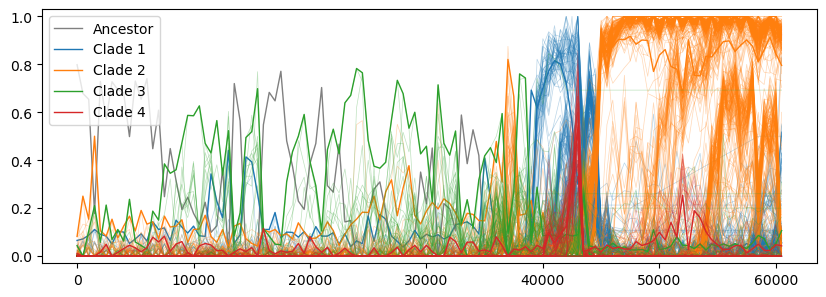

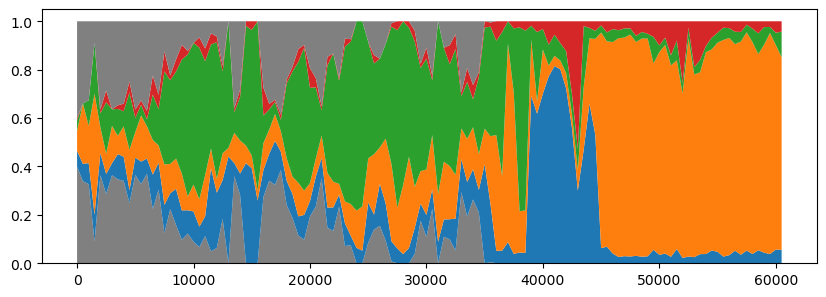

CPU times: user 54.5 s, sys: 921 ms, total: 55.4 s
Wall time: 55.8 s


In [12]:
%%time
reload()
pop = 'm3'
groups = LH.load_clusterization_for_LTEE(pop)
reconstruction = LH.reconstructForAPopulationAsOnePeriod(pop, 
    groups=groups, plot=True)

<------------------------------------------------------------------------------------------>
> Initializing variables...	took: 0.000165s
Reconstructing... took 143.752s
No clade getting fixed. Treating the entire evolution as a whole competition period.  


/Users/yunxiao/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


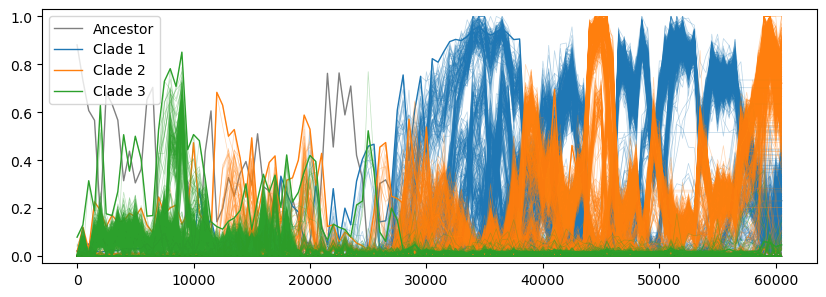

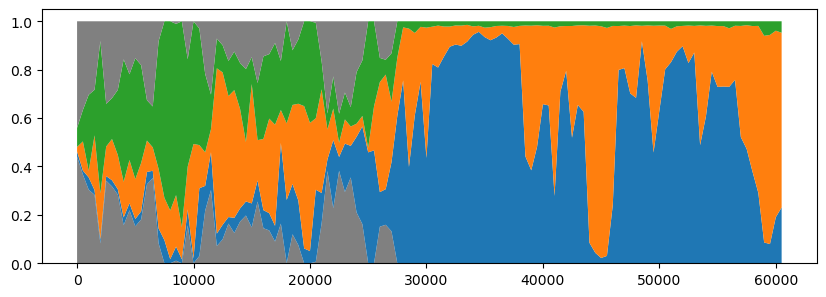

CPU times: user 2min 44s, sys: 1.82 s, total: 2min 46s
Wall time: 2min 45s


In [13]:
%%time
reload()
pop = 'p6'
groups = LH.load_clusterization_for_LTEE(pop)
reconstruction = LH.reconstructForAPopulationAsOnePeriod(pop, 
    groups=groups, plot=True)

<------------------------------------------------------------------------------------------>
> Initializing variables...	took: 0.000171s
Reconstructing... took 57.448s
No clade getting fixed. Treating the entire evolution as a whole competition period.  


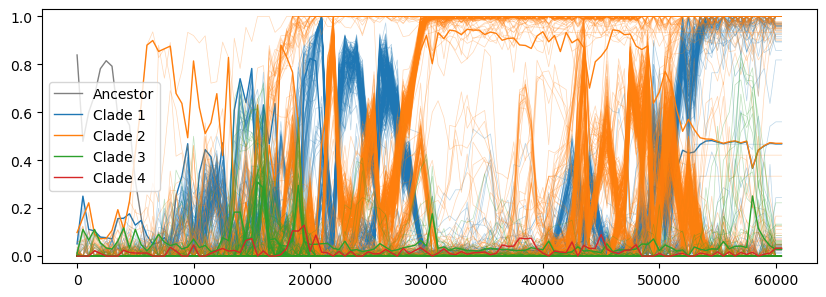

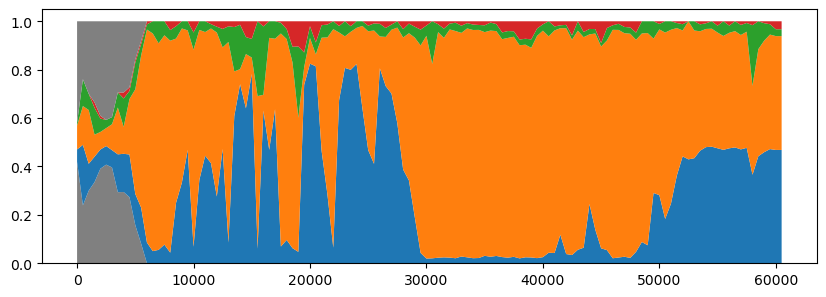

CPU times: user 1min 2s, sys: 1.35 s, total: 1min 4s
Wall time: 1min 4s


In [22]:
%%time
reload()
pop = 'p3'
groups = LH.load_clusterization_for_LTEE(pop)
reconstruction = LH.reconstructForAPopulationAsOnePeriod(pop, 
    groups=groups, plot=True)

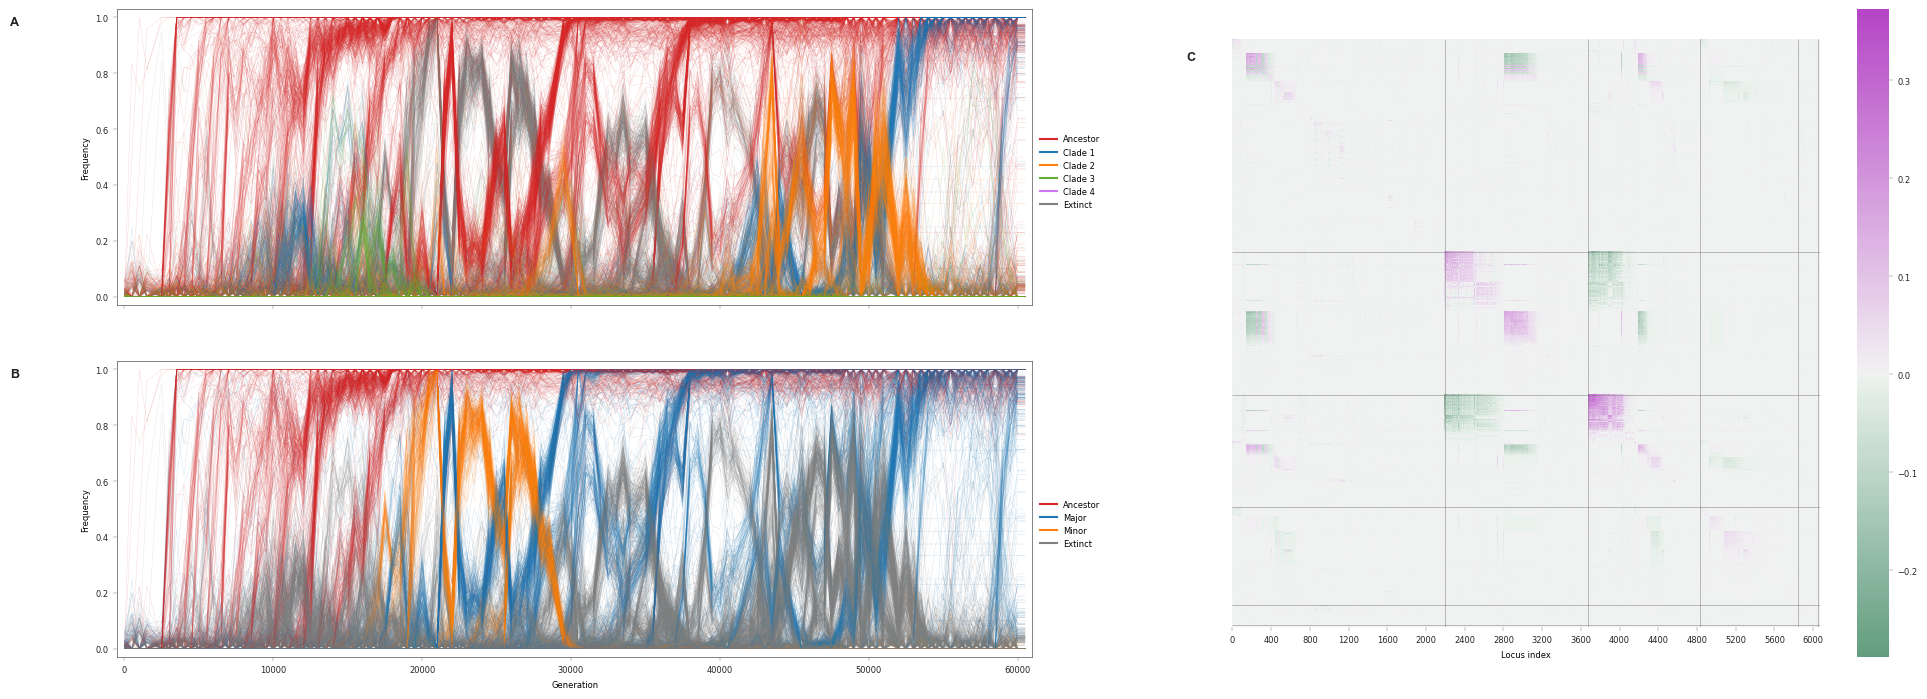

RuntimeError: The command
    xelatex -interaction=nonstopmode -halt-on-error figure.tex
failed and generated the following output:
This is XeTeX, Version 3.141592653-2.6-0.999994 (TeX Live 2022) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./figure.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2022-12-17>
(/usr/local/texlive/2022/texmf-dist/tex/latex/hyperref/hyperref.sty
(/usr/local/texlive/2022/texmf-dist/tex/generic/ltxcmds/ltxcmds.sty)
(/usr/local/texlive/2022/texmf-dist/tex/generic/iftex/iftex.sty)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pdftexcmds/pdftexcmds.sty
(/usr/local/texlive/2022/texmf-dist/tex/generic/infwarerr/infwarerr.sty))
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/kvsetkeys/kvsetkeys.sty)
(/usr/local/texlive/2022/texmf-dist/tex/generic/kvdefinekeys/kvdefinekeys.sty)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pdfescape/pdfescape.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/hycolor/hycolor.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/letltxmacro/letltxmacro.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/auxhook/auxhook.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/hyperref/nameref.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/refcount/refcount.sty)
(/usr/local/texlive/2022/texmf-dist/tex/generic/gettitlestring/gettitlestring.s
ty (/usr/local/texlive/2022/texmf-dist/tex/latex/kvoptions/kvoptions.sty)))
(/usr/local/texlive/2022/texmf-dist/tex/latex/hyperref/pd1enc.def)
(/usr/local/texlive/2022/texmf-dist/tex/generic/intcalc/intcalc.sty)
(/usr/local/texlive/2022/texmf-dist/tex/generic/etexcmds/etexcmds.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/hyperref/puenc.def)
(/usr/local/texlive/2022/texmf-dist/tex/latex/url/url.sty)
(/usr/local/texlive/2022/texmf-dist/tex/generic/bitset/bitset.sty
(/usr/local/texlive/2022/texmf-dist/tex/generic/bigintcalc/bigintcalc.sty))
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/atbegshi-ltx.sty)

Package hyperref Warning: Option `pdfpagelabels' is turned off
(hyperref)                because \thepage is undefined.

) (/usr/local/texlive/2022/texmf-dist/tex/latex/hyperref/hxetex.def
(/usr/local/texlive/2022/texmf-dist/tex/generic/stringenc/stringenc.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/rerunfilecheck/rerunfilecheck.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/atveryend-ltx.sty)
(/usr/local/texlive/2022/texmf-dist/tex/generic/uniquecounter/uniquecounter.sty
))) (/usr/local/texlive/2022/texmf-dist/tex/latex/base/minimal.cls
Document Class: minimal 2001/05/25 Standard LaTeX minimal class
) (/usr/local/texlive/2022/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2022/texmf-dist/tex/generic/iftex/ifvtex.sty))
(/usr/local/texlive/2022/texmf-dist/tex/latex/fontspec/fontspec.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/l3backend/l3backend-xetex.def)))
(/usr/local/texlive/2022/texmf-dist/tex/latex/fontspec/fontspec-xetex.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/fontenc.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/fontspec/fontspec.cfg)))
(/usr/local/texlive/2022/texmf-dist/tex/latex/pgf/basiclayer/pgf.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/pgf/utilities/pgfrcs.sty
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/utilities/pgfutil-common.te
x
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/utilities/pgfutil-common-li
sts.tex))
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/utilities/pgfutil-latex.def
) (/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/utilities/pgfrcs.code.tex
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/pgf.revision.tex)))
(/usr/local/texlive/2022/texmf-dist/tex/latex/pgf/basiclayer/pgfcore.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics/graphicx.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics/graphics.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics/trig.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics-cfg/graphics.cfg)
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics-def/xetex.def)))
(/usr/local/texlive/2022/texmf-dist/tex/latex/pgf/systemlayer/pgfsys.sty
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/systemlayer/pgfsys.code.tex
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/utilities/pgfkeys.code.tex
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/utilities/pgfkeysfiltered.c
ode.tex))
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/systemlayer/pgf.cfg)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/systemlayer/pgfsys-xetex.de
f
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/systemlayer/pgfsys-dvipdfmx
.def
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/systemlayer/pgfsys-common-p
df.def))))
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/systemlayer/pgfsyssoftpath.
code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/systemlayer/pgfsysprotocol.
code.tex)) (/usr/local/texlive/2022/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics/mathcolor.ltx))
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcore.code.tex
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/math/pgfmath.code.tex
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/math/pgfmathcalc.code.tex
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/math/pgfmathutil.code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/math/pgfmathparser.code.tex
)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.code.
tex
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.basic
.code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.trigo
nometric.code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.rando
m.code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.compa
rison.code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.base.
code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.round
.code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.misc.
code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/math/pgfmathfunctions.integ
erarithmetics.code.tex)))
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/math/pgfmathfloat.code.tex)
) (/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/math/pgfint.code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepoints.co
de.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepathconst
ruct.code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepathusage
.code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcorescopes.co
de.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcoregraphicst
ate.code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcoretransform
ations.code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcorequick.cod
e.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreobjects.c
ode.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepathproce
ssing.code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcorearrows.co
de.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreshade.cod
e.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreimage.cod
e.tex
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcoreexternal.
code.tex))
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcorelayers.co
de.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcoretranspare
ncy.code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcorepatterns.
code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/basiclayer/pgfcorerdf.code.
tex)))
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/modules/pgfmoduleshapes.cod
e.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/modules/pgfmoduleplot.code.
tex)
(/usr/local/texlive/2022/texmf-dist/tex/latex/pgf/compatibility/pgfcomp-version
-0-65.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/pgf/compatibility/pgfcomp-version
-1-18.sty))
No file figure.aux.
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: xetex
(./figure.pgf
Runaway text?
731.26381 3
! TeX capacity exceeded, sorry [main memory size=5000000].
\temp ->34
          0.11581 
l.130600 \pgfusepath{stroke}
                            %
No pages of output.
Transcript written on figure.log.

and the following error:


In [53]:
reload()
pop = 'p3'
FIG.plot_figure_reconstruction_example_LTEE(pop, reconstruction_98, 
    LH.data, alpha=0.2, figsize=(20, 8),
    save_file=FIG_DIR + "/fig-reconstruction-example-LTEE-p3-new.pdf")

<------------------------------------------------------------------------------------------>
> Initializing variables...	took: 0.000110s
Reconstructing... took 57.202s
No clade getting fixed. Treating the entire evolution as a whole competition period.  


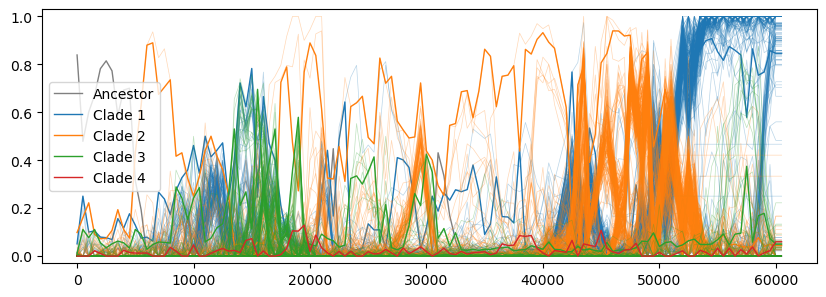

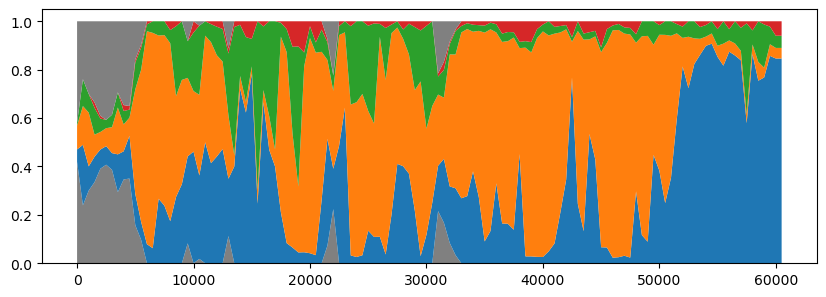

CPU times: user 1min 1s, sys: 1.26 s, total: 1min 3s
Wall time: 1min 2s


In [32]:
%%time
reload()
pop = 'p3'
groups = LH.load_clusterization_for_LTEE(pop)
reconstruction_98 = LH.reconstructForAPopulationAsOnePeriod(pop, thFixed=0.98,
    groups=groups, plot=True)

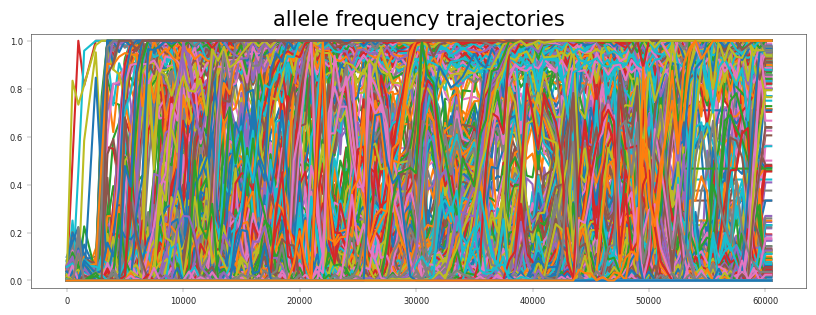

In [33]:
AP.plotTraj(reconstruction_98.traj, times=reconstruction_98.times)

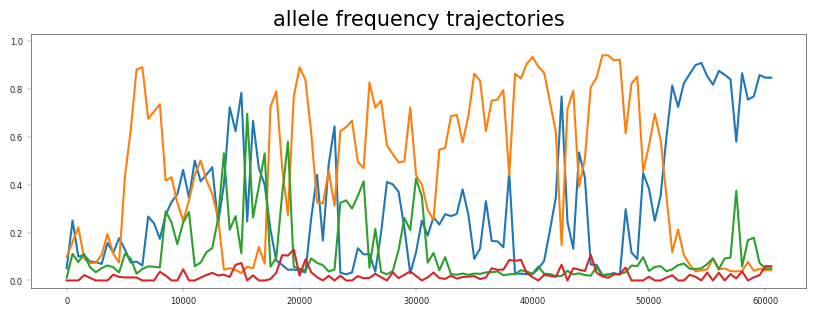

In [34]:
AP.plotTraj(reconstruction_98.cladeFreq, times=reconstruction_98.times)

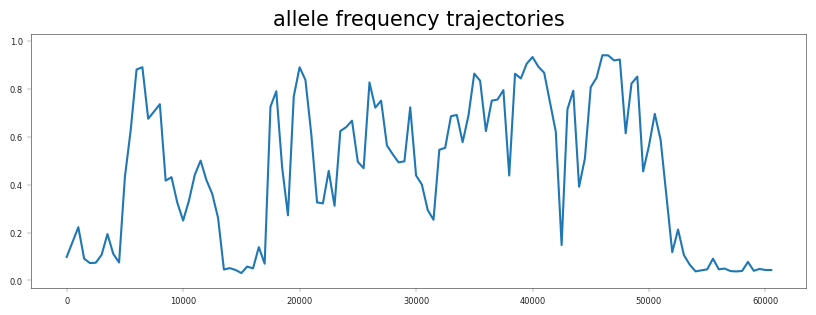

In [35]:
AP.plotTraj(reconstruction_98.cladeFreq[:, 1:2], times=reconstruction_98.times)

In [36]:
print(len(reconstruction_98.otherMuts))

4584


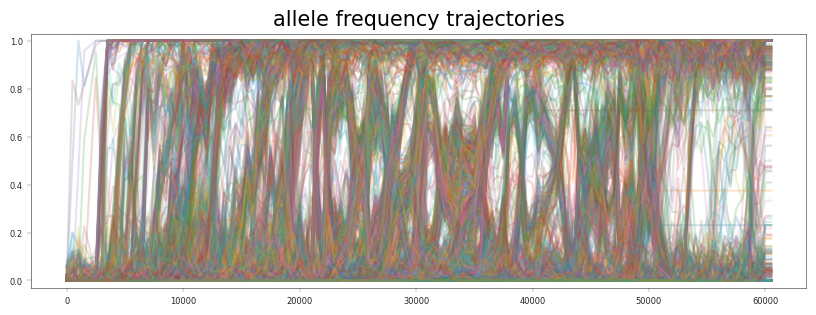

In [37]:
AP.plotTraj(reconstruction_98.traj[:, reconstruction_98.otherMuts], times=reconstruction_98.times, alpha=0.2)

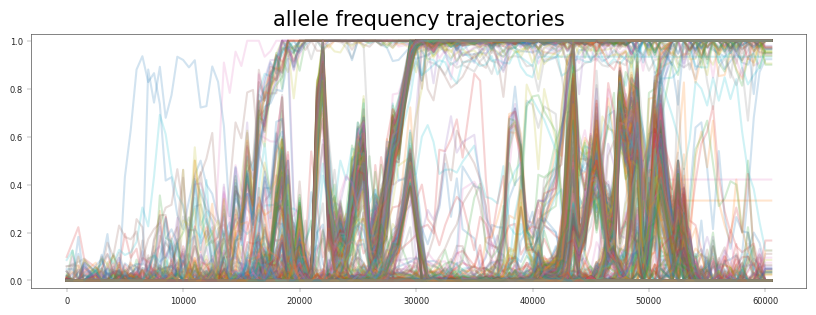

In [38]:
AP.plotTraj(reconstruction_98.traj[:, reconstruction.cladeMuts[1]], times=reconstruction_98.times, alpha=0.2)

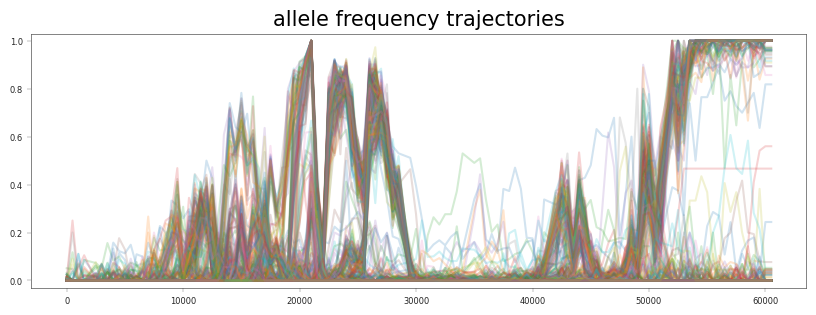

In [39]:
AP.plotTraj(reconstruction_98.traj[:, reconstruction.cladeMuts[0]], times=reconstruction_98.times, alpha=0.2)

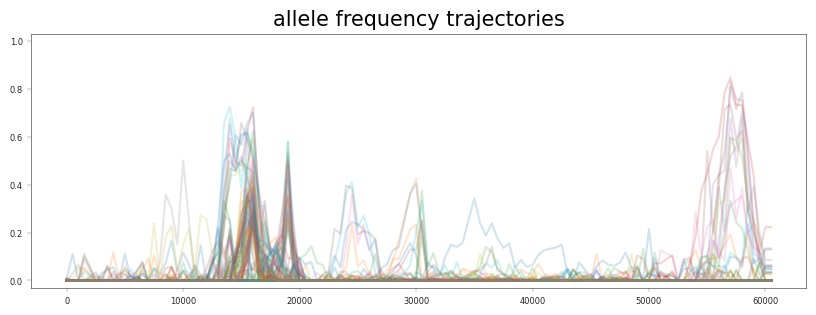

In [40]:
AP.plotTraj(reconstruction_98.traj[:, reconstruction.cladeMuts[2]], times=reconstruction_98.times, alpha=0.2)

In [54]:
reconstruction_backup.thFixed

0.98

In [41]:
pop = 'p3'
reconstruction_backup = LH.load_reconstruction_for_LTEE(pop)

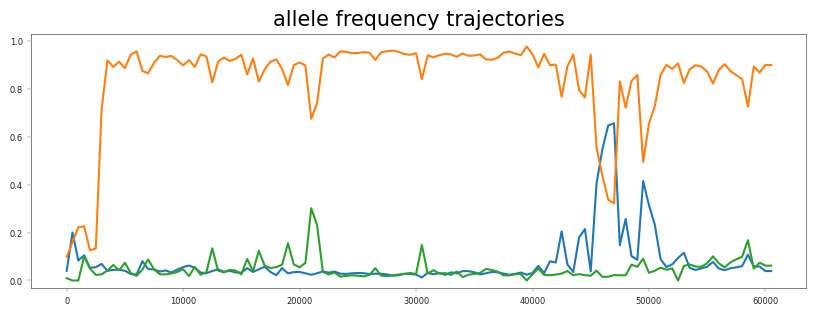

In [42]:
AP.plotTraj(reconstruction_backup.cladeFreq, times=reconstruction_backup.times)

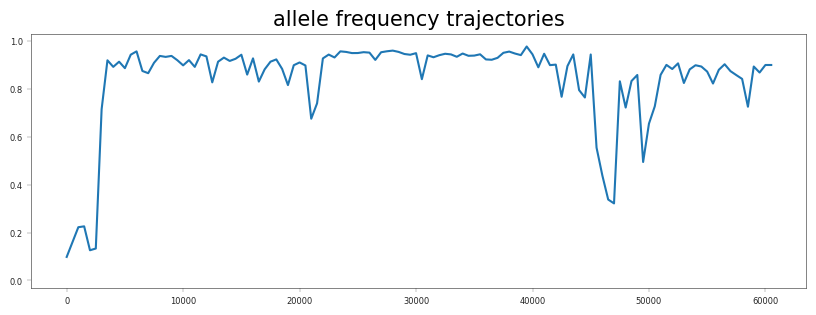

In [43]:
AP.plotTraj(reconstruction_backup.cladeFreq[:, 1:2], times=reconstruction_backup.times)

In [44]:
print(len(reconstruction_backup.otherMuts))

4719


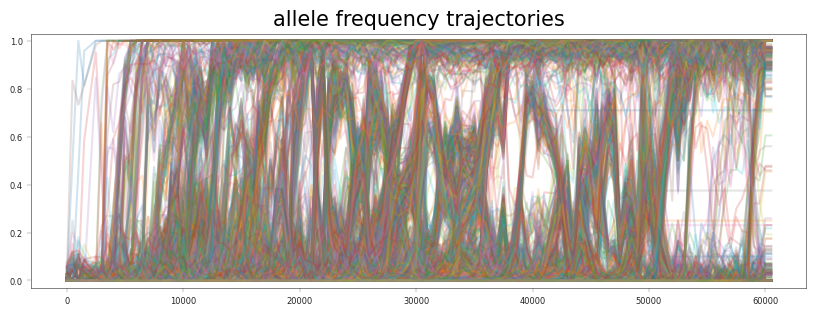

In [49]:
AP.plotTraj(reconstruction_backup.traj[:, reconstruction_backup.otherMuts], 
            times=reconstruction_backup.times, alpha=0.2)

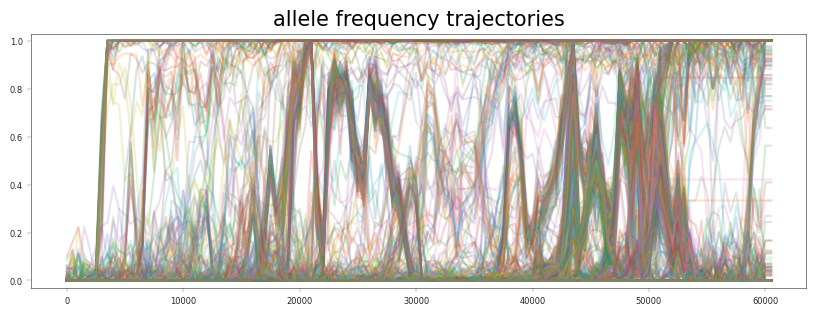

In [50]:
AP.plotTraj(reconstruction_backup.traj[:, reconstruction_backup.cladeMuts[1]], 
            times=reconstruction_backup.times, alpha=0.2)


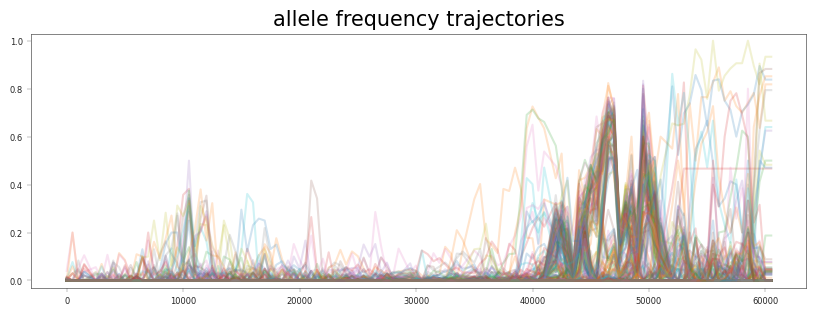

In [51]:
AP.plotTraj(reconstruction_backup.traj[:, reconstruction_backup.cladeMuts[0]], 
            times=reconstruction_backup.times, alpha=0.2)

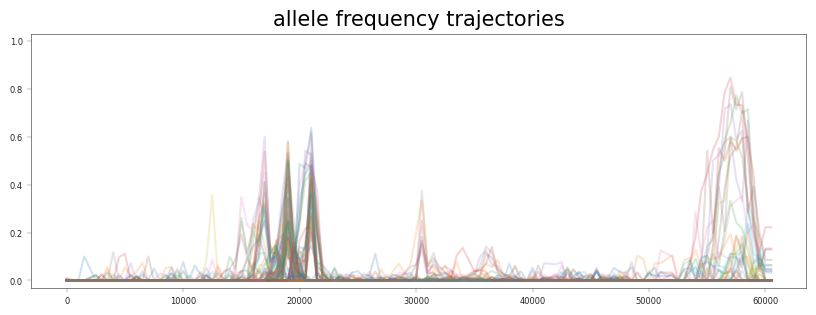

In [52]:
AP.plotTraj(reconstruction_backup.traj[:, reconstruction_backup.cladeMuts[2]], 
            times=reconstruction_backup.times, alpha=0.2)

### Store runtime of recosntrution

In [9]:
reload()
run_time = LH.get_reconstruction_run_time()

> Initializing variables...	took: 0.000099s
Reconstructing... took 1.504s
> Initializing variables...	took: 0.000035s
Reconstructing... took 2.090s
> Initializing variables...	took: 0.000042s
Reconstructing... took 1.997s
> Initializing variables...	took: 0.000036s
Reconstructing... took 2.326s
> Initializing variables...	took: 0.000077s
Reconstructing... took 4.078s
> Initializing variables...	took: 0.000045s
Reconstructing... took 4.318s
> Initializing variables...	took: 0.000079s
Reconstructing... took 28.129s
> Initializing variables...	took: 0.000351s
Reconstructing... took 50.831s
> Initializing variables...	took: 0.000092s
Reconstructing... took 30.916s
> Initializing variables...	took: 0.000104s
Reconstructing... took 45.972s
> Initializing variables...	took: 0.000106s
Reconstructing... took 56.355s
> Initializing variables...	took: 0.000099s
Reconstructing... took 84.905s


In [15]:
print(run_time * 3600)

[ 1.54683454  2.12476867  2.06636208  2.39865917  4.19653058  4.45505508
 28.93726417 51.76162521 32.26514408 47.12866854 57.77363208 87.64421662]


# Lolipop on LTEE data

In [34]:
reload()
for pop in LH.populations:
    LH.create_tables_for_lolipop(pop)

In [50]:
reload()
LH.generate_lolipop_scipts_for_LTEE_data()

In [134]:
reload()
LH.generate_lolipop_scipts_for_LTEE_data(['p3', 'p6'])

In [137]:
reload()
LH.generate_lolipop_scipts_for_LTEE_data(['m1', 'm2', 'm3', 'm4'])

# Evoracle on LTEE data

In [46]:
reload()
LH.save_traj_for_evoracle()

In [131]:
reload()
LH.generate_evoracle_scripts()

# Compare running time

In [79]:
datetime.strptime('Sun Jan 22 20:09:46 2023', '%a %b %d %H:%M:%S %Y')

datetime.datetime(2023, 1, 22, 20, 9, 46)

In [17]:
reload()
running_time = {
    'recovered': [],
    'Lolipop': [],
    'Evoracle': [],
}
for pop in LH.populations_sorted_by_num_alleles:
    running_time['recovered'].append(LH.get_clustering_run_time_for_a_pop(pop))
    running_time['Lolipop'].append(LH.get_lolipop_run_time_for_a_pop(pop))
    running_time['Evoracle'].append(LH.get_evoracle_run_time_for_a_pop(pop))

In [18]:
reload()
for pop in LH.populations_mutator:
    print(pop, LH.get_lolipop_process_for_a_pop(pop))

100%|██████████| 51050460/51050460 [105:22:00<00:00, 134.58it/s]


In [19]:
reload()
headers = [''] + LH.populations_sorted_by_num_alleles
row_num_alleles = ['num_alleles'] + num_alleles_sorted
row_recovered = ['recovered (h)'] + ['%.2f' % _ for _ in running_time['recovered']]
row_Lolipop = ['Lolipop (h)'] + ['%.2f' % _ if _ != 'nan' else _ for _ in running_time['Lolipop']]
row_Evoracle = ['Evoracle (h)'] + ['%.2f' % _ if _ != 'nan' else _ for _ in running_time['Evoracle']]
rows = [row_num_alleles, row_recovered, row_Lolipop, row_Evoracle]

print(tabulate(rows, headers, tablefmt='plain', numalign="right"))

                 p2    p4    p5    m6    m5    p1    m3    m2    m1    m4    p3     p6
num_alleles     174   201   202   221   406   466  3255  3488  4597  4872  6102  10134
recovered (h)  0.02  0.01  0.01  0.02  0.04  0.03  2.28  2.44  1.91  2.16  3.07   6.77
Lolipop (h)    0.18  0.22  0.24   0.4  1.39  1.68   nan   nan   nan   nan   nan    nan
Evoracle (h)   2.55  3.12  3.85  3.98  5.45  6.36   nan   nan   nan   nan   nan    nan


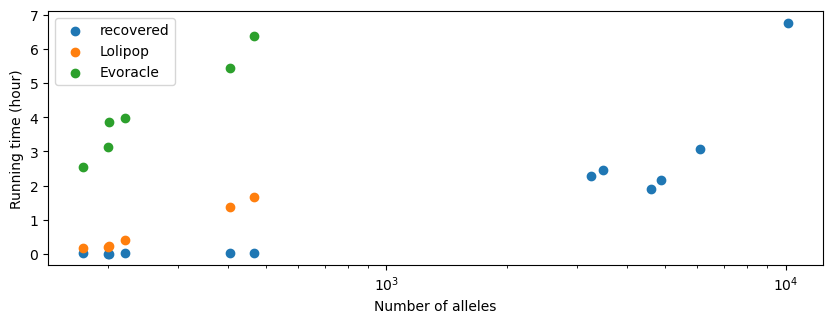

In [122]:
fig = plt.figure(figsize=(10, 3.3))
for method in ['recovered', 'Lolipop', 'Evoracle']:
    plt.scatter(num_alleles_sorted, running_time[method], label=method)
plt.xscale('log')
plt.ylabel('Running time (hour)', fontsize=10)
plt.xlabel('Number of alleles', fontsize=10)
plt.legend(fontsize=10)
plt.show()

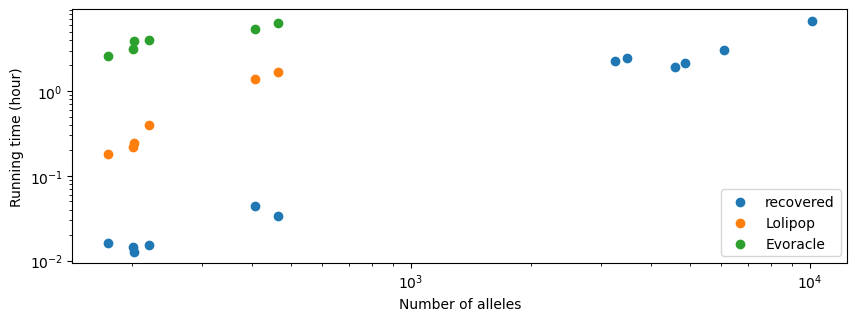

In [135]:
# At least a supp figure
fig = plt.figure(figsize=(10, 3.3))
for method in ['recovered', 'Lolipop', 'Evoracle']:
    plt.scatter(num_alleles_sorted, running_time[method], label=method)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Running time (hour)', fontsize=10)
plt.xlabel('Number of alleles', fontsize=10)
plt.legend(fontsize=10)
plt.show()